## FireProtDB - ddG Target Class (Multiclass classification) - Linear Discriminant Analysis ##

In [1]:
#Initial setup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')

print("Setup Complete")

Setup Complete


In [2]:
ddG_df = pd.read_csv('Apr10FireProtDB_FeatGen_targetclass.csv')
ddG_df = ddG_df.dropna()
ddG_df = ddG_df.drop(['protein_name',
                      'uniprot_id',
                      'ddG',
                      'secondary_structure',
                      'sequence',
                      'MEC',
                      'Aliphatic Index'], axis=1)

y = ddG_df['target_class']
X = ddG_df.drop(['target_class'], axis=1)

In [25]:
print(ddG_df.shape)
ddG_df.head()

(3261, 12)


,asa,b_factor,pH,Instability index,Isoelectric point,Hydrophobicity,Aromaticity,Molecular weight,Fraction helix,Fraction turn,Fraction sheet,target_class
0,5.27,17.64,6.5,53.863197,4.704188,-0.420074,0.111524,30747.5732,0.334572,0.301115,0.330855,0
1,5.27,17.64,6.5,53.863197,4.704188,-0.420074,0.111524,30747.5732,0.334572,0.301115,0.330855,0
2,5.27,17.64,6.5,53.863197,4.704188,-0.420074,0.111524,30747.5732,0.334572,0.301115,0.330855,1
3,5.27,17.64,6.5,53.863197,4.704188,-0.420074,0.111524,30747.5732,0.334572,0.301115,0.330855,1
4,87.91,34.91,6.5,53.863197,4.704188,-0.420074,0.111524,30747.5732,0.334572,0.301115,0.330855,0


## Test size 20% ##

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("LDA accuracy score: {0:04f}".format(accuracy_score(y_test, y_pred)))
y_pred_train = model.predict(X_train)
print('Model (train set) accuracy score: {0:04f}'.format(accuracy_score(y_train, y_pred_train)))

LDA accuracy score: 0.745789
Model (train set) accuracy score: 0.730828


## Test size 30% ##

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("LDA accuracy score: {0:04f}".format(accuracy_score(y_test, y_pred)))
y_pred_train = model.predict(X_train)
print('Model (train set) accuracy score: {0:04f}'.format(accuracy_score(y_train, y_pred_train)))

LDA accuracy score: 0.736466
Model (train set) accuracy score: 0.730061


## Gridsearch for best parameters ##

In [30]:
param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],  # Solver algorithm for LDA
    'shrinkage': [None, 'auto', 0.1, 0.5, 1.0]  # Regularization to prevent overfitting (only for 'lsqr' or 'eigen')
}
# Note: If solver is 'svd', shrinkage must be None (ignored)

In [36]:
grid_search_cv = GridSearchCV(estimator=model, param_grid=param_grid_lda, cv=5, n_jobs=1, verbose=0, scoring='accuracy')

grid_search_cv.fit(X_train, y_train)

best_params = grid_search_cv.best_params_
best_model = grid_search_cv.best_estimator_

print('Best Parameters: ', best_params)
print('Best Model: ', best_model)

best_accuracy = grid_search_cv.best_score_
print(f'Best Cross-Validation Accuracy: {best_accuracy:.2f}')

Best Parameters:  {'shrinkage': None, 'solver': 'svd'}
Best Model:  LinearDiscriminantAnalysis()
Best Cross-Validation Accuracy: 0.73


## Best parameters ##

In [40]:
lda_best = LinearDiscriminantAnalysis(shrinkage=None, solver='svd')
lda_best.fit(X_train, y_train)
y_pred_best = lda_best.predict(X_test)
print("Linear discriminant analysis accuracy (best parameters): {0:04f}".format(accuracy_score(y_test, y_pred_best)))
print('Training set score: {:.4f}'.format(lda_best.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lda_best.score(X_test, y_test)))

Linear discriminant analysis accuracy (best parameters): 0.745789
Training set score: 0.7308
Test set score: 0.7458


## Evaluation ##

**Default parameters**

In [19]:
#For 20% test size
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.69      0.55      0.61       216
           1       0.78      0.85      0.81       420
           2       0.50      0.53      0.51        17

    accuracy                           0.75       653
   macro avg       0.65      0.65      0.65       653
weighted avg       0.74      0.75      0.74       653



**Best parameters**

In [44]:
#For 20% test size BEST PARAMETERS
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.69      0.55      0.61       216
           1       0.78      0.85      0.81       420
           2       0.50      0.53      0.51        17

    accuracy                           0.75       653
   macro avg       0.65      0.65      0.65       653
weighted avg       0.74      0.75      0.74       653



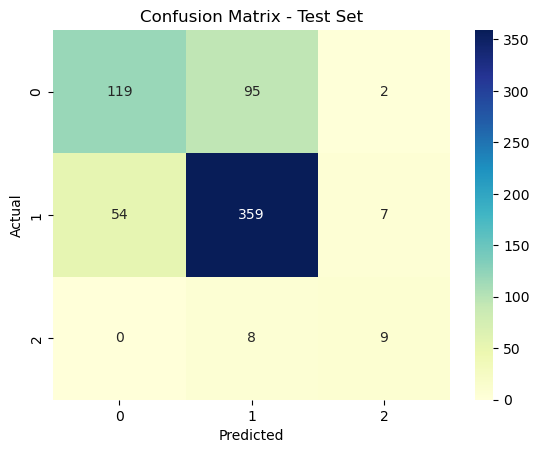

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()